# CSE 3506 : Essentials of Data Analytics
## J- Component
# Crop Prediction based on Soil using Machine Learning

### Importing libraries 

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sb
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import StackingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report

### Dataset

In [3]:
PATH = 'crops dataset.csv'
df = pd.read_csv(PATH)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


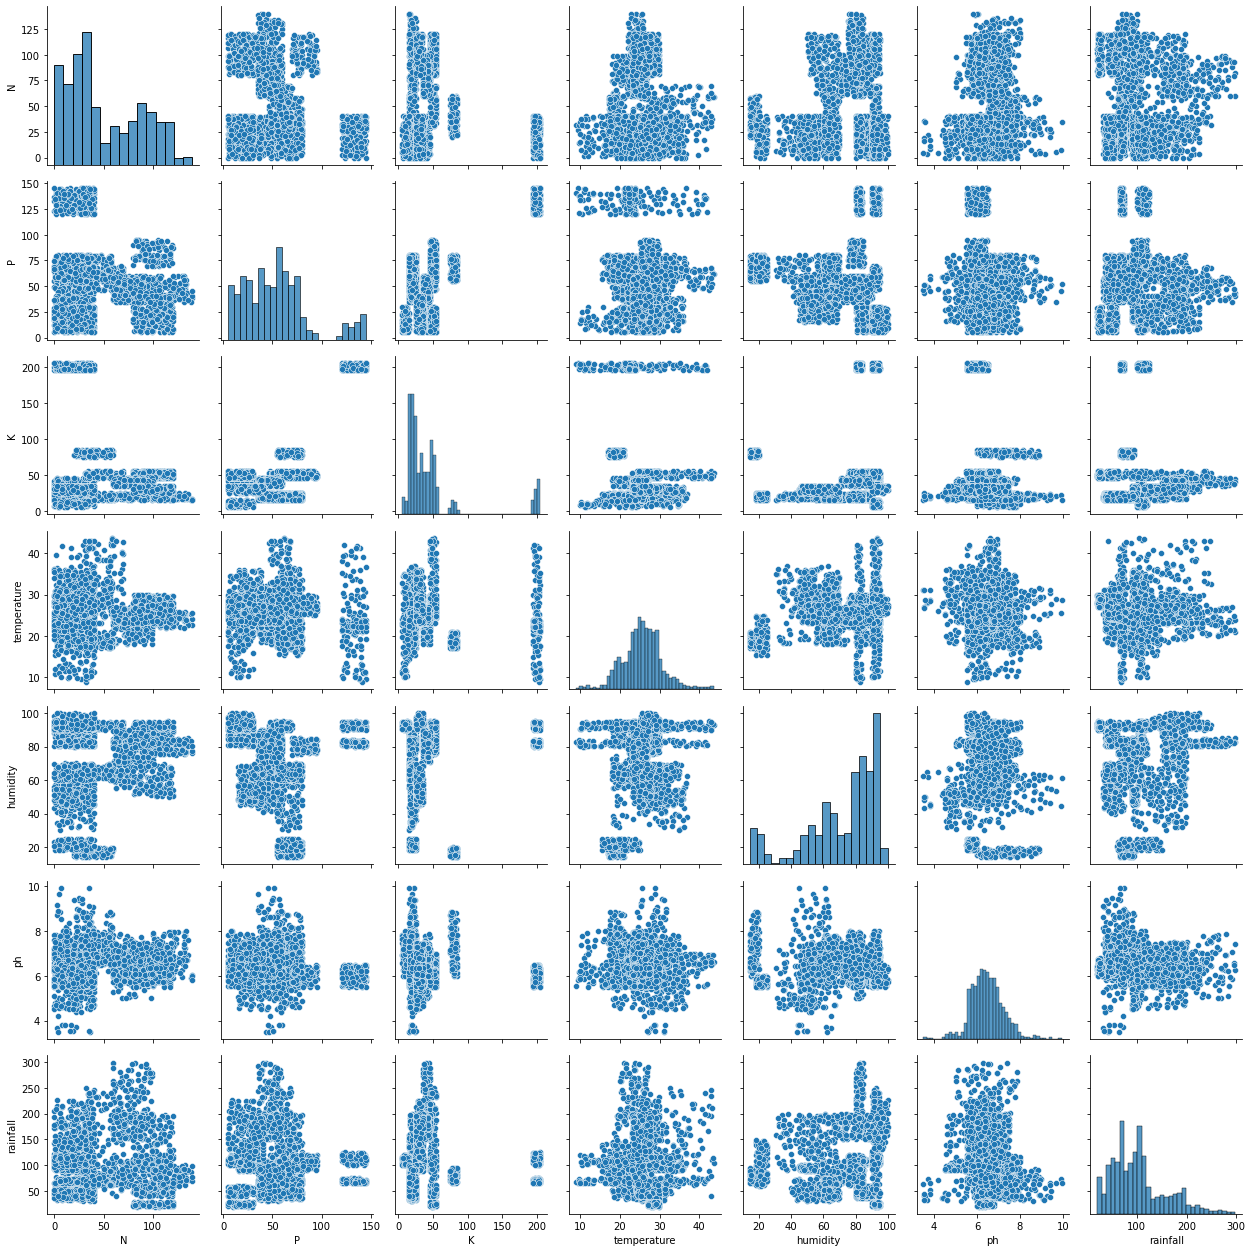

In [59]:
sns.pairplot(df,palette="husl")
plt.tight_layout()

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

pigeonpeas     100
mango          100
mungbean       100
coconut        100
papaya         100
coffee         100
blackgram      100
cotton         100
grapes         100
banana         100
orange         100
muskmelon      100
mothbeans      100
kidneybeans    100
apple          100
chickpea       100
rice           100
lentil         100
jute           100
watermelon     100
pomegranate    100
maize          100
Name: label, dtype: int64

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

acc = []
model = []

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [13]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)

In [14]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [15]:
import pickle

DT_pkl_filename = 'DecisionTree.pkl'

DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)

DT_Model_pkl.close()

In [16]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


score = cross_val_score(NaiveBayes,features,target,cv=5)

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [17]:
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [18]:
import pickle

NB_pkl_filename = 'NBClassifier.pkl'

NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

NB_Model_pkl.close()



from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score


SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))



# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score


Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [20]:
import pickle
# Dump the trained classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()


from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [21]:
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## Plotting different model accuracies & comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

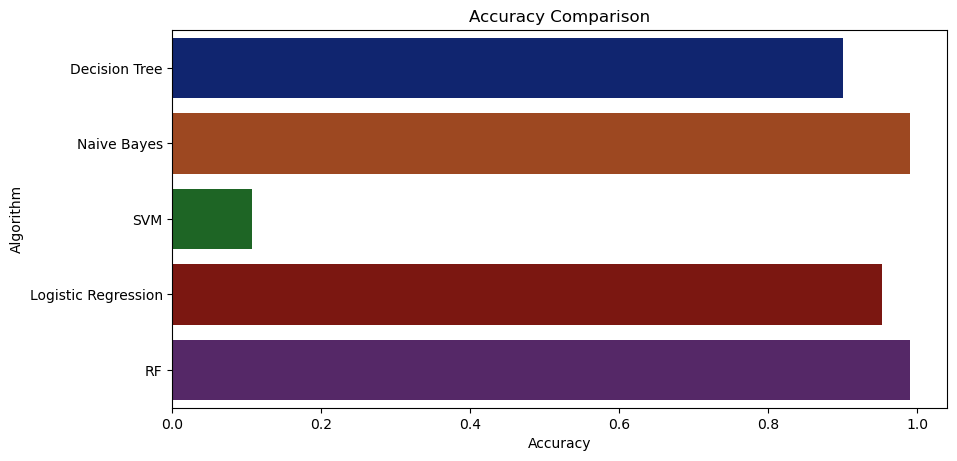

In [22]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## Hyper parameter tuning

In [23]:
tr_accu=[]
te_accu=[]
modelname=[]

In [24]:
from sklearn.model_selection import GridSearchCV
params = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}

lr_clf = LogisticRegression()
lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(Xtrain, Ytrain)
best_params = lr_cv.best_params_
print("Best parameters: ",best_params)

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters:  {'C': 545.5594781168514, 'solver': 'liblinear'}


LogisticRegression(C=545.5594781168514, solver='liblinear')

In [25]:
#accuracy on training data
pred = lr_clf.predict(Xtrain)
print('Logistic Regression Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Ytrain, pred))

Logistic Regression Hyperparameter Tuning - Accuracy on Training data :  0.9715909090909091


Logistic Regression Hyperparameter Tuning - Accuracy on Testing data :  0.9477272727272728

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.83      0.94      0.88        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.71      0.77        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      0.96      0.94        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.84      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1

<AxesSubplot:>

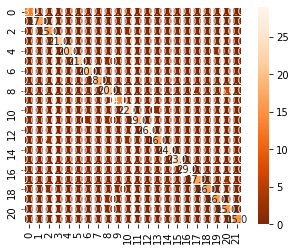

In [26]:
#accuracy on test data
pred = lr_clf.predict(Xtest)
print('Logistic Regression Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Ytest, pred))
print('\nClassification Report:')
print(classification_report(Ytest, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Ytest, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [27]:
test_score = accuracy_score(Ytest, lr_clf.predict(Xtest)) * 100
train_score = accuracy_score(Ytrain, lr_clf.predict(Xtrain)) * 100

tr_accu.append(train_score)
te_accu.append(test_score)
modelname.append('LR')

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,97.159091,94.772727


In [28]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(Xtrain, Ytrain)
best_params = rf_cv.best_params_
print("Best parameters: ",best_params)

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}


RandomForestClassifier(max_depth=10, n_estimators=900)

In [ ]:
import pickle
# Dump the trained classifier with Pickle
rfHT_pkl_filename = 'RF_ht.pkl'
# Open the file to save as pkl file
RF_ht_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf_clf, RF_ht_Model_pkl)
# Close the pickle instances
RF_ht_Model_pkl.close()

In [29]:
#accuracy on training data
pred = rf_clf.predict(Xtrain)
print('Random Forest Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Ytrain, pred))

Random Forest Hyperparameter Tuning - Accuracy on Training data :  0.9982954545454545


Random Forest Hyperparameter Tuning - Accuracy on Testing data :  0.990909090909091

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00    

<AxesSubplot:>

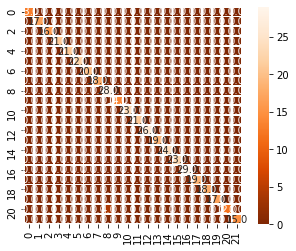

In [30]:
#accuracy on test data
pred = rf_clf.predict(Xtest)
print('Random Forest Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Ytest, pred))
print('\nClassification Report:')
print(classification_report(Ytest, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Ytest, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [31]:
test_score = accuracy_score(Ytest, rf_clf.predict(Xtest)) * 100
train_score = accuracy_score(Ytrain, rf_clf.predict(Xtrain)) * 100

tr_accu.append(train_score)
te_accu.append(test_score)
modelname.append('RF')

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Random Forest Classifier,99.829545,99.090909


In [32]:
svm_clf = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_cv = GridSearchCV(svm_clf, params, refit = True, verbose = 3)
svm_cv.fit(Xtrain, Ytrain)
best_params = svm_cv.best_params_
print("Best parameters: ",best_params)

svm_clf = svm.SVC(**best_params)
svm_clf.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 4/5] END ...............

SVC(C=10, gamma=0.001)

In [33]:
#accuracy on training data
pred = svm_clf.predict(Xtrain)
print('SVM Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Ytrain, pred))

SVM Hyperparameter Tuning - Accuracy on Training data :  0.9971590909090909


SVM Hyperparameter Tuning - Accuracy on Testing data :  0.975

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00      

<AxesSubplot:>

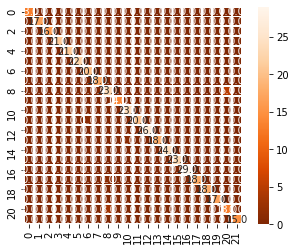

In [34]:
#accuracy on test data
pred = svm_clf.predict(Xtest)
print('SVM Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Ytest, pred))
print('\nClassification Report:')
print(classification_report(Ytest, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Ytest, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [35]:
test_score = accuracy_score(Ytest, svm_clf.predict(Xtest)) * 100
train_score = accuracy_score(Ytrain, svm_clf.predict(Xtrain)) * 100

tr_accu.append(train_score)
te_accu.append(test_score)
modelname.append('SVM')

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,97.159091,94.772727
1,Tuned Support Vector Machine,99.715909,97.500000


In [36]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(Xtrain, Ytrain)
best_params = tree_cv.best_params_
print("Best parameters: ",best_params)

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=12)

In [37]:
#accuracy on training data
pred = tree_clf.predict(Xtrain)
print('Decision Tree Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Ytrain, pred))

Decision Tree Hyperparameter Tuning - Accuracy on Training data :  0.9988636363636364


Decision Tree Hyperparameter Tuning - Accuracy on Testing data :  0.9840909090909091

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00   

<AxesSubplot:>

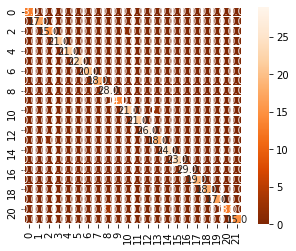

In [38]:
#accuracy on test data
pred = tree_clf.predict(Xtest)
print('Decision Tree Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Ytest, pred))
print('\nClassification Report:')
print(classification_report(Ytest, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Ytest, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [39]:
test_score = accuracy_score(Ytest, tree_clf.predict(Xtest)) * 100
train_score = accuracy_score(Ytrain, tree_clf.predict(Xtrain)) * 100

tr_accu.append(train_score)
te_accu.append(test_score)
modelname.append('DT')

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Decision Tree Classifier,99.886364,98.409091


## Stacking

In [40]:
X =df.drop(columns='label', axis=1)
Y = df['label']

In [41]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True,random_state=10)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [42]:
models = list()
models.append(('logreg', lr_clf))
models.append(('rf', rf_clf))
models.append(('svm', svm_clf))
models.append(('dectree,',tree_clf))

stackedmodel = StackingClassifier(estimators=models, final_estimator=KNeighborsClassifier(n_neighbors=44))
stackedmodel.fit(X_train, y_train)
y_predicted = stackedmodel.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.8954545454545455')

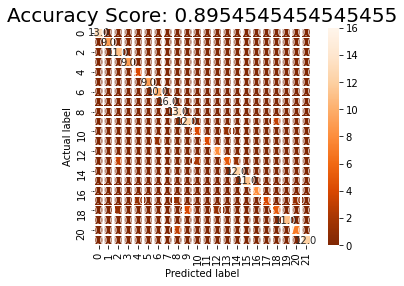

In [43]:
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_predicted))
plt.title(all_sample_title, size = 20)

<AxesSubplot:title={'center':'Accuracy Comparison of Simple Classifiers'}, xlabel='Accuracy', ylabel='Algorithm'>

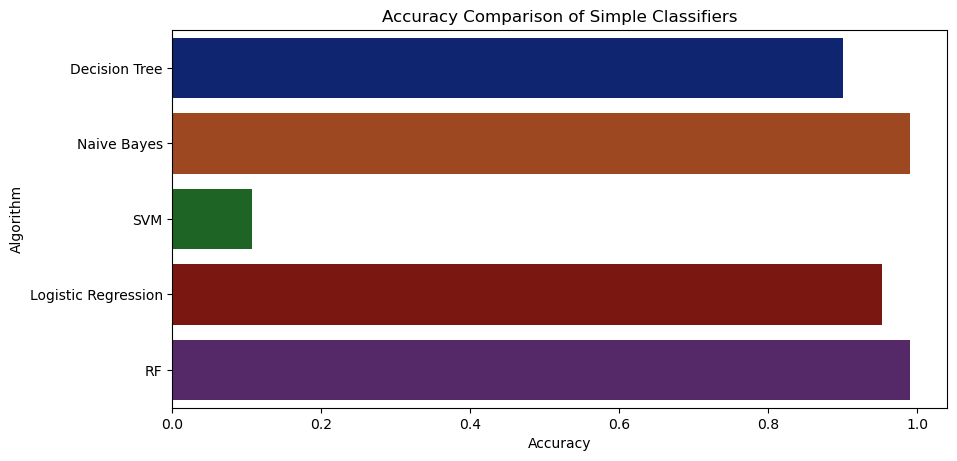

In [44]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison of Simple Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

<AxesSubplot:title={'center':'Hypertuning - Training Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

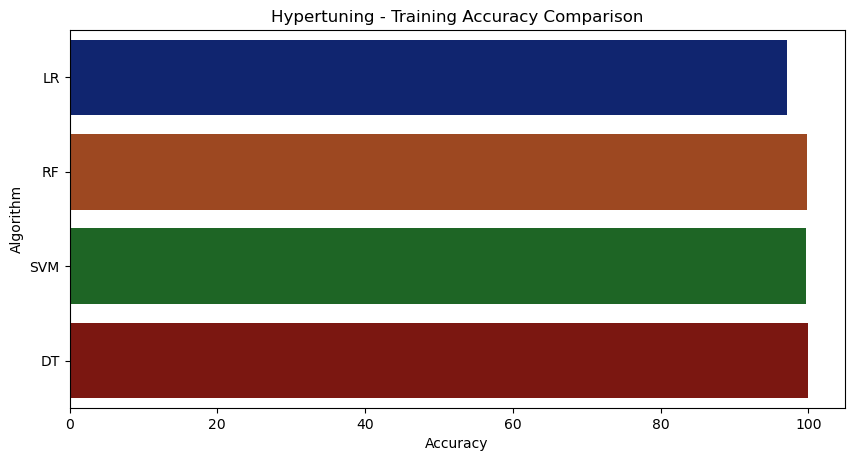

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Hypertuning - Training Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = tr_accu,y = modelname,palette='dark')

<AxesSubplot:title={'center':'Hypertuning - Testing Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

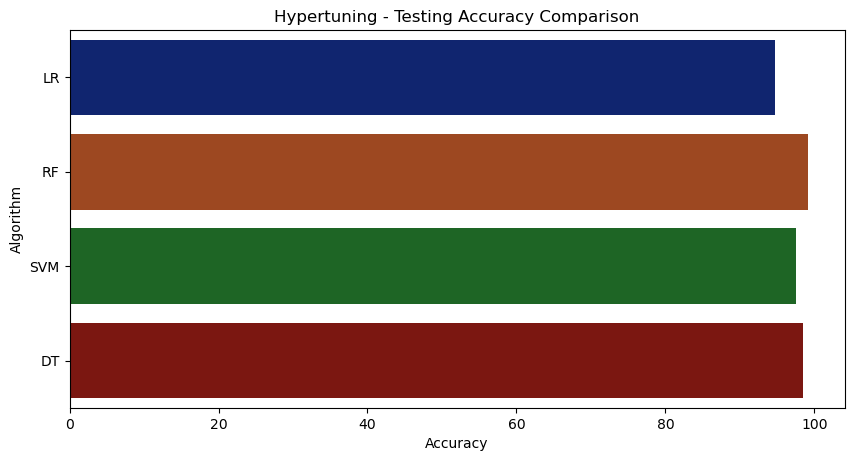

In [46]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Hypertuning - Testing Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = te_accu,y = modelname,palette='dark')

#### Inference: Stacking Ensemble provides an accuracy score of 89.5% when using KFold along with Stacking, which is worse than hypertuning of every other model. The only model it beats is SVM without any hypertuning, hence stacking is not the best method for this. 

Hypertuning therefore proves to be a best fit model - considering SVM, Decision Tree, Random Forest, Naive Bayes and Logistic Regression 

The best hyper tuned model was Decision tree having accuracy of 99.886364% in training accuracy and 98.409091% in testing accuracy.
